<a href="https://colab.research.google.com/github/chaudharygarima29/Machine_learning_projects/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [20]:
data=pd.read_excel('/content/Book1.xlsx')

In [21]:
print(data)

         AT      PE
0     14.96  463.26
1     25.18  444.37
2      5.11  488.56
3     20.86  446.48
4     10.82  473.90
...     ...     ...
9563  16.65  460.03
9564  13.19  469.62
9565  31.32  429.57
9566  24.48  435.74
9567  21.60  453.28

[9568 rows x 2 columns]


In [22]:
print(data.head())

      AT      PE
0  14.96  463.26
1  25.18  444.37
2   5.11  488.56
3  20.86  446.48
4  10.82  473.90


Select your group’s 20 rows

In [16]:
group_num=17


Formula to calculate which rows belong to your group:

In [64]:
start_row = (group_num - 1) * 20 + 2
end_row   = group_num * 20 + 1


Convert Excel row numbers (starting at 1) to Python indices (starting at 0)

In [65]:
start_index=start_row-1
end_index=end_row


Select your 20 rows from the dataset

iloc[] → selects specific rows by their position

In [29]:
group_data=data.iloc[start_index:end_index].copy()

In [31]:
print(f"\nGroup {group_num} data (rows {start_row} to {end_row}):")
print(group_data)


Group 17 data (rows 322 to 341):
        AT      PE
321  23.70  436.94
322  16.22  461.06
323  24.75  438.28
324  10.48  472.61
325  29.53  426.85
326  12.59  470.18
327  23.50  455.38
328  29.01  428.32
329   9.75  480.35
330  19.55  455.56
331  21.05  447.66
332  24.72  443.06
333  21.19  452.43
334  10.77  477.81
335  28.68  431.66
336  29.87  431.80
337  22.99  446.67
338  24.66  445.26
339  32.63  425.72
340  31.38  430.58


iloc[:, 0] → selects the first column (Temperature, in °C).

iloc[:, 1] → selects the second column (Energy Output, in MW).

.values → converts them to a NumPy array for mathematical operations.

.reshape(-1, 1) → ensures the data is in a column format (not a single row).

In [72]:
'''iloc[:, 0] → selects the first column (Temperature, in °C).

iloc[:, 1] → selects the second column (Energy Output, in MW).

.values → converts them to a NumPy array for mathematical operations.

.reshape(-1, 1) → ensures the data is in a column format (not a single row).'''
X_raw = group_data.iloc[:, 0].values.reshape(-1, 1)
Y_raw = group_data.iloc[:, 1].values.reshape(-1, 1)

Transform the data (Standardization)

In [33]:
mean_x=np.mean(X_raw)
std_x=np.std(X_raw)

In [35]:
x=(X_raw-mean_x)/std_x

In [38]:
print(f"\nMean of X = {mean_x:.4f}")
print(f"Standard Deviation of X = {std_x:.4f}")
print("\nTransformed (standardized) X values:")
print(x)


Mean of X = 22.3510
Standard Deviation of X = 6.9910

Transformed (standardized) X values:
[[ 0.19296278]
 [-0.87698651]
 [ 0.34315619]
 [-1.69804385]
 [ 1.02689384]
 [-1.3962266 ]
 [ 0.16435451]
 [ 0.95251234]
 [-1.80246403]
 [-0.40065882]
 [-0.18609679]
 [ 0.33886495]
 [-0.16607101]
 [-1.65656186]
 [ 0.90530869]
 [ 1.0755279 ]
 [ 0.09140342]
 [ 0.33028247]
 [ 1.47032202]
 [ 1.29152033]]


In [39]:
#add a column of ones to X
x_new=np.hstack((np.ones_like(x), x))

In [40]:
print(x_new)

[[ 1.          0.19296278]
 [ 1.         -0.87698651]
 [ 1.          0.34315619]
 [ 1.         -1.69804385]
 [ 1.          1.02689384]
 [ 1.         -1.3962266 ]
 [ 1.          0.16435451]
 [ 1.          0.95251234]
 [ 1.         -1.80246403]
 [ 1.         -0.40065882]
 [ 1.         -0.18609679]
 [ 1.          0.33886495]
 [ 1.         -0.16607101]
 [ 1.         -1.65656186]
 [ 1.          0.90530869]
 [ 1.          1.0755279 ]
 [ 1.          0.09140342]
 [ 1.          0.33028247]
 [ 1.          1.47032202]
 [ 1.          1.29152033]]


In [73]:
#mathematical formula for Least Squares
#Linear Algebra module of NumPy (linalg)
# inv() function used for calculating inverse
theta_new = np.linalg.inv(x_new.T @ x_new) @ (x_new.T @ Y_raw)

In [44]:
# Extract the coefficients
theta0_new = theta_new[0, 0]  # intercept
theta1_new = theta_new[1, 0]  # slope


In [45]:
print("\nClosed-form Linear Regression Parameters:")
print(f"Theta0 (intercept) = {theta0_new:.6f}")
print(f"Theta1 (slope) = {theta1_new:.6f}")



Closed-form Linear Regression Parameters:
Theta0 (intercept) = 447.909000
Theta1 (slope) = -16.524934


In [67]:
#@ -> matrix multiplication
y_pred=x_new @ theta_new

In [70]:
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

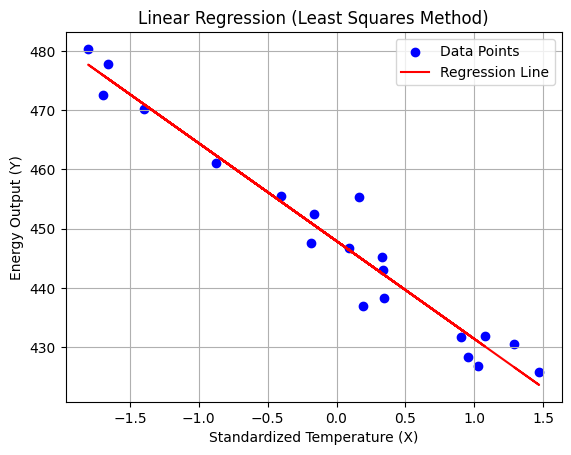

In [71]:
plt.scatter(x, Y_raw, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression (Least Squares Method)')
plt.xlabel('Standardized Temperature (X)')
plt.ylabel('Energy Output (Y)')
plt.legend()
plt.grid(True)
plt.show()